Linear Regression Equation - Normal Equation
$$ \hat{\theta} = (X^{T}X)^{-1} X^{T} y $$ 

In [1]:
import numpy as np

In [31]:
x = 2 * np.random.rand(100,1)
y = 4 + 3.6 *  x + np.random.randn(100,1)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

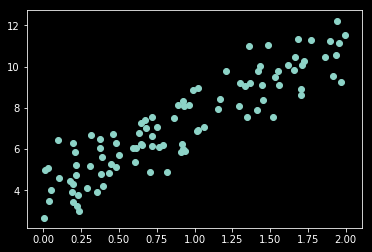

In [33]:
plt.scatter(x,y)
plt.show()

In [34]:
x_b = np.c_[np.ones((100,1)),x] # adding x0 = 1 to each instance

In [35]:
theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

In [36]:
theta

array([[3.94040792],
       [3.59678604]])

The theta value is very close to our normal equation. 

In [40]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b @ theta

In [41]:
y_predict

array([[ 3.94040792],
       [11.13397999]])

In [42]:
x_new

array([[0],
       [2]])

In [43]:
x_new_b

array([[1., 0.],
       [1., 2.]])

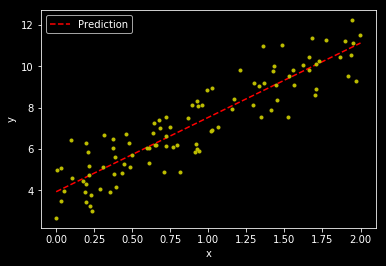

In [56]:
plt.plot(x_new,y_predict,"r--",label='Prediction')
plt.plot(x,y,"y.")
plt.xlabel("x")
plt.ylabel("y",)
plt.legend()